In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

In [2]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [3]:
# Import thư viện
import os
import yaml
import random
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from collections import Counter
from PIL import Image
from ultralytics import YOLO
import multiprocessing
import torch
from glob import glob

In [ ]:
def main():
    model = YOLO("yolo12n.yaml")
    model.train(
        data='/kaggle/input/vietnameses-tomato-disease-dataset/YOLO/data.yaml',
        epochs=200,
        imgsz=640,
        batch=64,
        pretrained=False,
        device="cuda",
        verbose=True,
        plots=True,
        patience=30,
        resume=True,
        
        #Tăng cường
        degrees=10,
        translate=0.1,
        scale=0.5,
        shear=2.0,
        perspective=0.001,
        flipud=0.2,
        fliplr=0.5,
        mosaic=0.8,
        mixup=0.2,
        copy_paste=0.2,
        hsv_h=0.015,
        hsv_s=0.7,
        hsv_v=0.5
    )

if __name__ == '__main__':
    multiprocessing.freeze_support()
    main()

In [ ]:
# Đánh giá mô hình trên Test YOLOv12n
model = YOLO("/kaggle/input/yolov12-nano/pytorch/tomato/1/yolov12n.pt")
model.to('cuda')

data_yaml = "/kaggle/input/vietnameses-tomato-disease-dataset/YOLO/data.yaml"

if __name__ == '__main__':
    metrics = model.val(data=data_yaml, split='test', save_json=True)

YOLO12n summary (fused): 159 layers, 2,558,483 parameters, 0 gradients, 6.3 GFLOPs


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 20.6±2.7 MB/s, size: 69.6 KB)


val: Scanning /kaggle/input/vietnameses-tomato-disease-dataset/YOLO/test/labels... 616 images, 0 backgrounds, 0 corrupt: 100%|██████████| 616/616 [00:02<00:00, 283.68it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/vietnameses-tomato-disease-dataset/YOLO/test is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [02:14<00:00,  3.44s/it]


                   all        616       2297      0.857      0.914       0.95      0.828
          Early Blight        201        290      0.929      0.905      0.974      0.862
               Healthy         71        292      0.804      0.805      0.893      0.725
           Late Blight        162        238      0.873      0.921      0.948      0.851
            Leaf Miner        121        168      0.895       0.97      0.979      0.866
             Leaf Mold        145        245      0.862      0.898      0.947      0.818
          Mosaic Virus        164        222      0.881      0.955      0.972      0.902
              Septoria        124        182      0.796      0.943      0.943      0.872
          Spider Mites         94        163      0.841      0.973      0.971      0.855
Yellow Leaf Curl Virus        156        497      0.835      0.853      0.922      0.705
Speed: 4.8ms preprocess, 203.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Saving runs/detect/val/pre


0: 640x640 2 Early Blights, 1 Late Blight, 1 Leaf Mold, 5.4ms
1: 640x640 16 Spider Mitess, 5.4ms
2: 640x640 1 Early Blight, 5.4ms
3: 640x640 2 Early Blights, 5.4ms
4: 640x640 1 Early Blight, 2 Mosaic Viruss, 1 Septoria, 5.4ms
5: 640x640 1 Leaf Mold, 5.4ms
6: 640x640 1 Early Blight, 1 Late Blight, 1 Leaf Miner, 1 Septoria, 5.4ms
7: 640x640 1 Late Blight, 1 Mosaic Virus, 1 Septoria, 1 Yellow Leaf Curl Virus, 5.4ms
8: 640x640 1 Leaf Miner, 5.4ms
9: 640x640 5 Healthys, 5.4ms
Speed: 1.8ms preprocess, 5.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


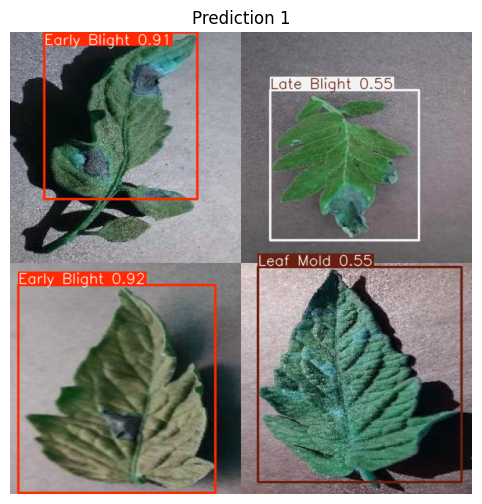

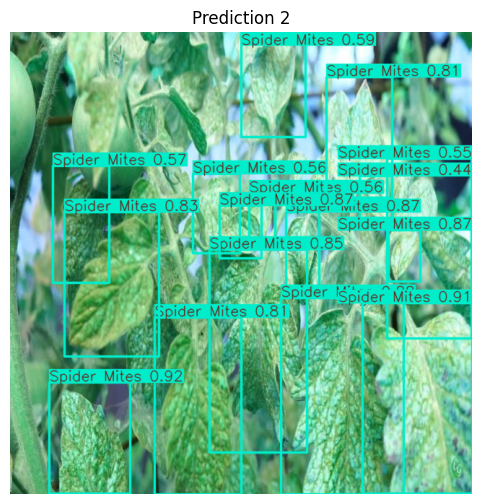

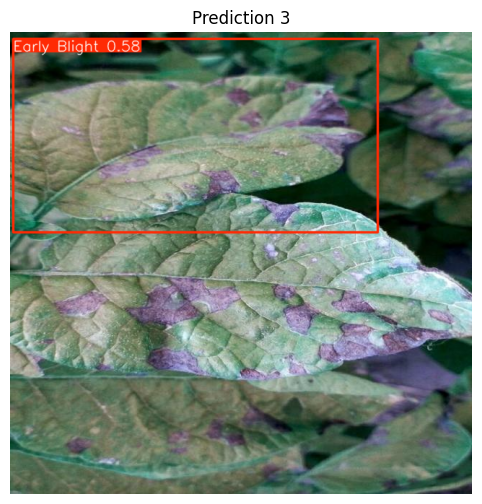

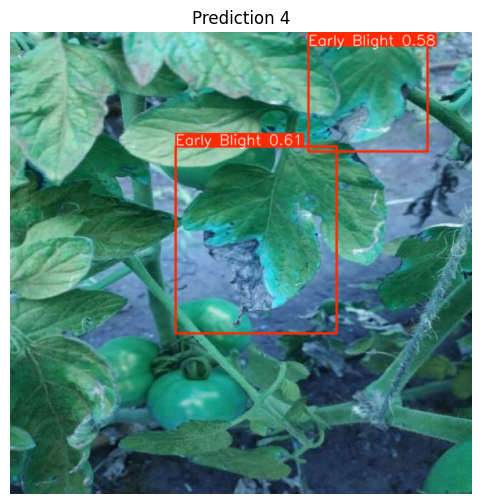

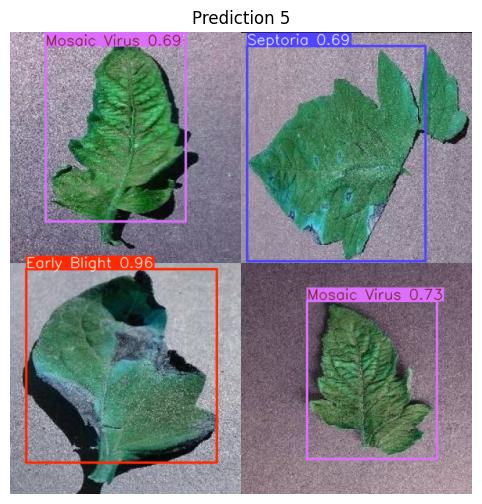

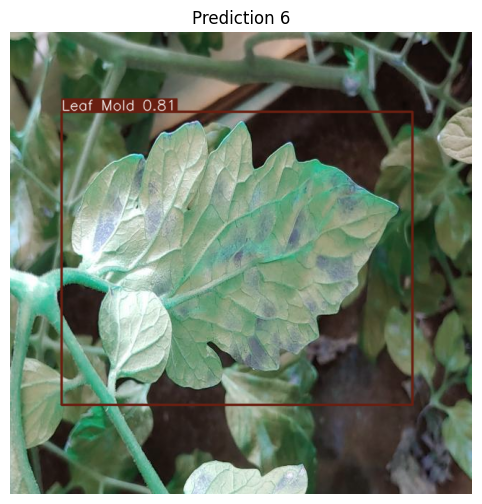

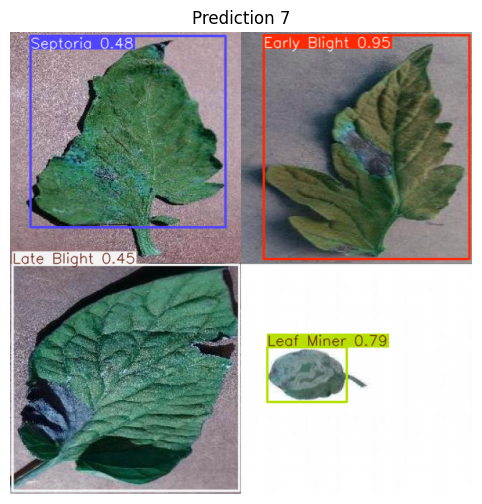

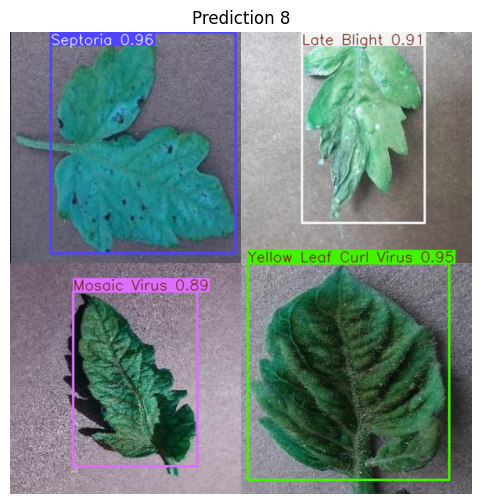

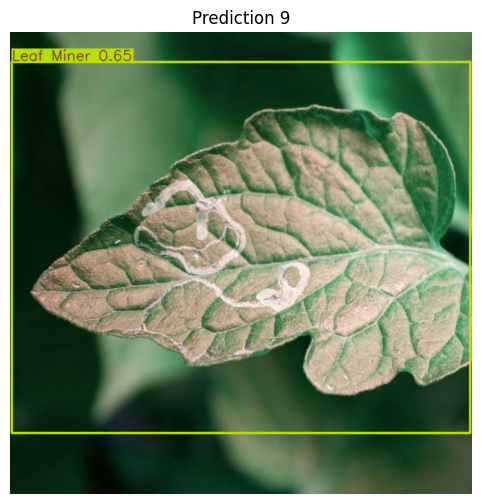

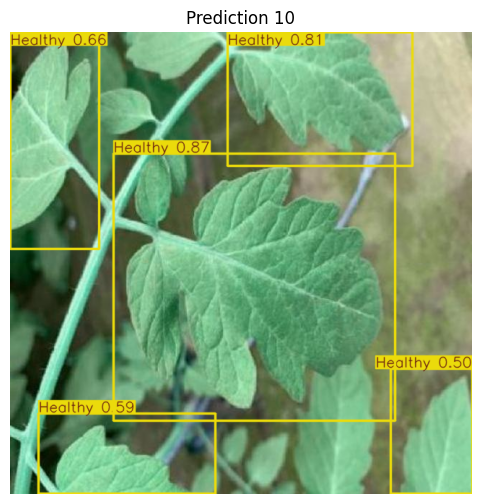

In [7]:
# Test nhận diện
model = YOLO("/kaggle/input/yolov12-nano/pytorch/tomato/1/yolov12n.pt")
model.to("cuda")

test_path_abs = '/kaggle/input/vietnameses-tomato-disease-dataset/YOLO/test/images'

image_paths = glob(os.path.join(test_path_abs, "*.jpg")) + glob(os.path.join(test_path_abs, "*.png"))

if len(image_paths) == 0:
    raise FileNotFoundError(f"Không tìm thấy ảnh nào trong thư mục test: {test_path_abs}")

sample_images = random.sample(image_paths, min(10, len(image_paths)))

results = model.predict(sample_images, save=False, conf=0.4)

for i, result in enumerate(results):
    im = result.plot()
    plt.figure(figsize=(8, 6))
    plt.imshow(im)
    plt.axis('off')
    plt.title(f"Prediction {i+1}")
    plt.show()